# Deep Learning Course: Lab Exercises

In this lab exercise you will:

a) Solve a simple Linear Regression problem with PyTorch.


# Note

Apart from the Questions, there are instruction comments throughout the notebook as well as comments inside the code cells beginning with two hashtags (##). In addition, there are #**START CODE  /  #**END CODE comments indicating the startand ending of your code sections. Pay attention not to delete these comments.

#**Q1 Solve a simple Linear Regression problem**

Find the linear relationship between a dependent variable 'y' and an independent variable 'x'.

Equation: y = 4x + 3

In [1]:
## create dummy data for training
import numpy as np
rng = np.random.default_rng(seed=1)
x_train = rng.uniform(low=0.0, high=10.0, size=(15,))
print(x_train)
x_train = np.array(x_train, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

[5.11821625 9.50463696 1.44159613 9.48649447 3.11831452 4.23326449
 8.27702594 4.09199136 5.49593688 0.27559113 7.53513109 5.38143313
 3.29731716 7.88428703 3.03194829]


In [2]:
##create the y values according to equation y = 4x + 3
# *****START CODE
y_train = 3*x_train + 4

# *****END CODE
y_train = np.array(y_train, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [3]:
import torch
##convert x_train and y_train numpy arrays to pytorch tensors
# *****START CODE
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
# *****END CODE

In [4]:
class LinearRegression(torch.nn.Module):
    def __init__(self, in_size, out_size):
        super(LinearRegression, self).__init__()
        ##Define a linear layer
        # *****START CODE
        self.linear = torch.nn.Linear(in_size, out_size)
        # *****END CODE

    def forward(self, x):
        out = self.linear(x)
        return out

In [5]:
##define input and output dimensions of the model
# *****START CODE
in_dim = 1
out_dim = 1
# *****END CODE

LR = 0.01 
epochs = 100

model = LinearRegression(in_dim, out_dim)

In [6]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

In [7]:
#model.train()
for epoch in range(epochs):
    # Set all gradients to zero
    optimizer.zero_grad()

    # feed the inputs to the model, and get the outputs
    outputs = model(x_train)

    # calculate loss for the predicted output
    loss = criterion(outputs, y_train)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 552.7752685546875
epoch 1, loss 48.60337448120117
epoch 2, loss 5.828587055206299
epoch 3, loss 2.186342716217041
epoch 4, loss 1.863158106803894
epoch 5, loss 1.8215950727462769
epoch 6, loss 1.80403733253479
epoch 7, loss 1.7886313199996948
epoch 8, loss 1.7735271453857422
epoch 9, loss 1.7585641145706177
epoch 10, loss 1.7437291145324707
epoch 11, loss 1.7290195226669312
epoch 12, loss 1.7144333124160767
epoch 13, loss 1.6999707221984863
epoch 14, loss 1.685629963874817
epoch 15, loss 1.6714091300964355
epoch 16, loss 1.6573100090026855
epoch 17, loss 1.6433290243148804
epoch 18, loss 1.6294653415679932
epoch 19, loss 1.6157186031341553
epoch 20, loss 1.6020880937576294
epoch 21, loss 1.588574767112732
epoch 22, loss 1.575173258781433
epoch 23, loss 1.5618840456008911
epoch 24, loss 1.548709511756897
epoch 25, loss 1.5356452465057373
epoch 26, loss 1.5226898193359375
epoch 27, loss 1.5098443031311035
epoch 28, loss 1.497107982635498
epoch 29, loss 1.4844775199890137
ep

Create random test data and evaluate the trained model.

In [8]:
## create 'x' values for testing
# *****START CODE
x_test = rng.uniform(low=0.0, high=10.0, size=(15,))
x_test = np.array(x_test, dtype=np.float32)
x_test = x_test.reshape(-1, 1)
# *****END CODE

In [9]:
##create the corresponding testing 'y' values
# *****START CODE
y_test = 4*x_test + 3
# *****END CODE

Evaluate the model.

In [10]:
from matplotlib import pyplot as plt

model.eval()
with torch.no_grad(): # we don't need gradients in the testing phase
        predicted = model(x_test).data.numpy()

In [12]:
##Print the predicted values and the true values
print('Predicted: ')
# *****START CODE
print(predicted )
# *****END CODE

print('True y values: ')
# *****START CODE
print(y_test)
# *****END CODE

Predicted: 
[[16.996359 ]
 [ 6.474913 ]
 [15.336908 ]
 [ 8.761082 ]
 [10.699602 ]
 [26.773813 ]
 [11.295584 ]
 [18.040186 ]
 [34.361244 ]
 [33.732838 ]
 [25.931498 ]
 [19.885757 ]
 [11.179731 ]
 [ 7.3513365]
 [34.005154 ]]
True y values: 
[[17.604937]
 [ 8.021252]
 [16.09339 ]
 [10.103657]
 [11.8694  ]
 [26.51094 ]
 [12.412263]
 [18.555729]
 [33.422115]
 [32.849716]
 [25.743698]
 [20.236805]
 [12.306736]
 [ 8.81956 ]
 [33.097763]]


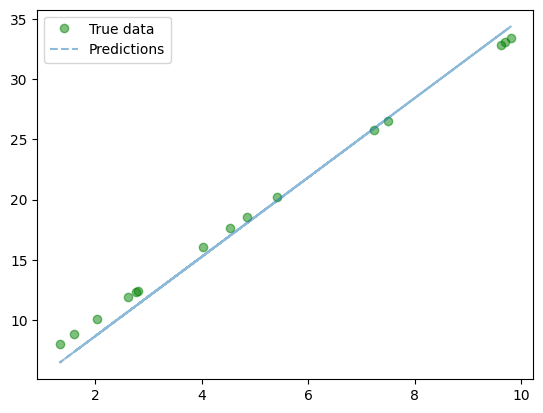

In [11]:
from matplotlib import pyplot as plt

##plot the predicted values along with the true values
plt.plot(x_test, y_test , 'go', label='True data', alpha=0.5)
plt.plot(x_test, predicted , '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

#**Q2 Classification with an MLP**

We are going to work with a dataset of 8x8 images of digits, and our goal will be to classify them.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [14]:
digits_dataset = load_digits()
digits_x = digits_dataset.images / 16
digits_y = digits_dataset.target
print(f'There are {len(digits_x)} images in this dataset of size {digits_x.shape[1:]}.')

There are 1797 images in this dataset of size (8, 8).


In [15]:
train_x, val_x, train_y, val_y = train_test_split(digits_x, digits_y, test_size=0.2, shuffle=True)

In [16]:
def plot_digit(x, y, idx):
    x = x[idx]
    plt.imshow(x)
    plt.title(y[idx])
    plt.show()

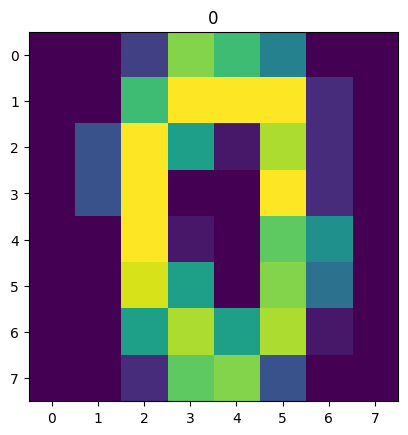

In [17]:
plot_digit(digits_x, digits_y, 20)

You will now implement a simple 2 layer MLP model that you will train using gradient descent algorithm.

Here are a few reminders:

Let $\mathcal{M}$ be a 2 a layer MLP model trained on $X$ to predict $y$ with categorical cross-entropy loss. We have:

\begin{equation}
    \mathcal{L} = - \sum_{i=1}^{n} y_ilog(\hat{y}_i)
\end{equation}

$\mathcal{M}$ can be decomposed as:

\begin{equation}
    \hat{y} &= \sigma_2(Z_2) \\
    Z_2 &= W_2Y_1 + b_2
\end{equation}

with $\sigma_2$ the softmax activation function.

and:

\begin{equation}
    Y_1 &= \sigma_1(Z_1) \\
    Z_1 &= W_1X + b_1
\end{equation}

with $\sigma_1$ the sigmoid activation function.

### Question

Compute the gradient of the softmax activation function used in the output layer for categorical cross-entropy loss.

### Answer: Gradient of Softmax Activation Function

\begin{equation}
    \hat{y}_i &= \sigma_2(l_i) \\
    &= \frac{e^{l_i}}{\sum{e^l}}
\end{equation}

For $i=k$:
\begin{equation}
    \frac{\partial\hat{y}_i}{\partial{l_k}} &= \frac{e^{l_i}\sum{e^l}-e^{l_i}e^{l_k}}{(\sum{e^l})^2} \\
    &= \frac{e^{l_i}}{\sum{e^l}}(1-\frac{e^{l_k}}{\sum{e^l}}) \\
    &= \hat{y_i}(1-\hat{y}_k) \\
    &= \hat{y_k}(1-\hat{y}_k)
\end{equation}

For $i\neq k$:

\begin{equation}
    \frac{\partial\hat{y}_i}{\partial{l_k}} &= \frac{0*\sum{e^l}-e^{l_i}e^{l_k}}{(\sum{e^l})^2} \\
    &= -\frac{e^{l_i}}{\sum{e^l}}*\frac{e^{l_k}}{\sum{e^l}} \\
    &= -\hat{y_i}\hat{y}_k
\end{equation}

### Question

Compute the gradient of the categorical cross-entropy loss function $\mathcal{L}$ with respect to the pre-activation outputs $Z_2$ of the second layer.

### Answer: Gradient of $\mathcal{L}$ with Respect to $Z_2$

\begin{equation}
    \frac{\partial \mathcal{L}}{\partial l_k} &= - \sum_{i=1}^{n} y_i \frac{\partial log(\hat{y}_i)}{\partial l_k} \\
    &=- \sum_{i=1}^{n} \frac{y_i}{\hat{y}_i} \frac{\partial\hat{y}_i}{\partial l_k} \\
    &= \sum_{i\neq k} \frac{y_i}{\hat{y}_i} \hat{y}_i\hat{y}_k - \frac{y_k}{\hat{y}_k} * \hat{y}_k(1-\hat{y}_k) \\
    &= \sum_{i\neq k} y_i\hat{y}_k - y_k + y_k\hat{y}_k \\
    &= \sum_{i} y_i\hat{y}_k - y_k \\
    &= \hat{y}_k - y_k
\end{equation}
So,
\begin{equation}
    \frac{\partial \mathcal{L}}{\partial Z_2} &= \hat{y} - y \\
    &= \sigma_2(Z_2) - y
\end{equation}

### Question

Based on your understanding of backpropagation, derive the expressions for gradients of the loss function with respect to weights $W_2$ and biases $b_2$ in the second layer.

### Answer:  Gradients with Respect to $W_2$ and $b_2$

\begin{equation}
\frac{\partial \mathcal{L}}{\partial W_2} &=  \frac{\partial \mathcal{L}}{\partial \hat{Z_2}}\frac{\partial Z_2}{\partial \hat{W_2}} \\
&= Y_1^T.(\hat{y}-y)
\end{equation}

\begin{equation}
\frac{\partial \mathcal{L}}{\partial b_2} &=  \frac{\partial \mathcal{L}}{\partial \hat{Z_2}}\frac{\partial Z_2}{\partial \hat{b_2}} \\
&= \sum\hat{y}-y
\end{equation}

### Question

Recall the gradient of sigmoid activation function

### Answer: Gradient of Sigmoid Activation Function

\begin{equation}
    \frac{\partial Y_1}{\partial Z_1} = Y_1(1-Y_1)
\end{equation}

### Question

Conclude the expression  for the gradients of the loss function with respect to weights $W_1$, and biases $b_1$ of the first layer.

### Answer: Gradients with Respect to $W_1$ and $b_1$

\begin{equation}
\frac{\partial \mathcal{L}}{\partial W_1} &=  \frac{\partial \mathcal{L}}{\partial Z_2}\frac{\partial Z_2}{\partial \hat{Y_1}} \frac{\partial Y_1}{\partial \hat{Z_1}} \frac{\partial Z_1}{\partial \hat{W_1}}\\
&= X^T \cdot ((\hat{y} - y) \cdot W_2^T) \odot (Y_1 \cdot (1 - Y_1))
\end{equation}

\begin{equation}
\frac{\partial \mathcal{L}}{\partial b_1} &= \frac{\partial \mathcal{L}}{\partial \hat{Z_2}}\frac{\partial Z_2}{\partial \hat{Y_1}} \frac{\partial Y_1}{\partial \hat{Z_1}} \frac{\partial Z_1}{\partial \hat{b_1}} \\
&= \sum ((\hat{y} - y) \cdot W_2^T) \odot (Y_1 \cdot (1 - Y_1))
\end{equation}

In [ ]:
class SimpleMLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        sigmoid_x = 1 / (1 + np.exp(-x))
        return sigmoid_x

    def softmax(self, x):
        # Softmax activation function for the output layer
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        softmax_x = exp_x / np.sum(exp_x, axis=1, keepdims=True)
        return softmax_x

    def forward(self, X):
        X = X.reshape(-1, self.input_size)
        # Forward pass
        self.hidden_output = self.sigmoid(np.dot(X, self.weights_input_hidden) + self.bias_hidden)
        self.predictions = self.softmax(np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output)
        return self.predictions

    def backward(self, X, y, learning_rate):

        X = X.reshape(-1, self.input_size)
        # Backward pass with gradient descent
        m = X.shape[0]
        # Calculate loss
        loss = -np.sum(np.log(self.predictions[range(m), y])) / m

        # Output layer gradients
        output_error = self.predictions
        output_error[range(m), y] -= 1
        output_error /= m

        # Hidden layer gradients
        hidden_error = self.hidden_output * (1 - self.hidden_output)
        hidden_error = np.dot(output_error, self.weights_hidden_output.T) * hidden_error

        # Update weights and biases
        self.weights_hidden_output -= learning_rate * np.dot(self.hidden_output.T, output_error)
        self.bias_output -= learning_rate * np.sum(output_error, axis=0, keepdims=True)
        self.weights_input_hidden -= learning_rate * np.dot(X.T, hidden_error)
        self.bias_hidden -= learning_rate * np.sum(hidden_error, axis=0, keepdims=True)

        return loss

    def train(self, X, y, epochs, learning_rate):
        # Training loop
        for epoch in range(epochs):
            predictions = self.forward(X)
            loss = self.backward(X, y, learning_rate)
            
            # Print the loss every 100 epochs
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')

Now that the model has been defined, let's initialize it, and train it.

In [62]:
input_dim = 64
hidden_dim = 32
output_dim = 10
model = SimpleMLP(input_dim, hidden_dim, output_dim)

In [63]:
model.train(train_x, train_y, 2000, 0.1)

Epoch 0, Loss: 7.236159863661613
Epoch 100, Loss: 1.8126498262693036
Epoch 200, Loss: 1.302506127770462
Epoch 300, Loss: 1.0007572340801134
Epoch 400, Loss: 0.8073748133325998
Epoch 500, Loss: 0.6785086685854831
Epoch 600, Loss: 0.5869995773356632
Epoch 700, Loss: 0.5189502084968768
Epoch 800, Loss: 0.4665675114280899
Epoch 900, Loss: 0.42504910911268845
Epoch 1000, Loss: 0.39129907750340154
Epoch 1100, Loss: 0.3632681225755993
Epoch 1200, Loss: 0.33956244284011455
Epoch 1300, Loss: 0.3192066035749164
Epoch 1400, Loss: 0.30149951866051883
Epoch 1500, Loss: 0.2859252822730844
Epoch 1600, Loss: 0.2720962097417368
Epoch 1700, Loss: 0.25971526931713296
Epoch 1800, Loss: 0.2485506773458328
Epoch 1900, Loss: 0.23841845099605888


Now, let's check the performance on the training and validation sets.

In [53]:
def evaluate_prediction(model, x, y):
    predictions = model.forward(x).argmax(axis=-1)
    top1_accuracy = (y == predictions).mean()
    return top1_accuracy

In [54]:
print(f'Accuracy on the training set {evaluate_prediction(model, train_x, train_y):.4f}.')
print(f'Accuracy on the validation set {evaluate_prediction(model, val_x, val_y):.4f}.')

Accuracy on the training set 0.9513.
Accuracy on the validation set 0.9528.
